# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

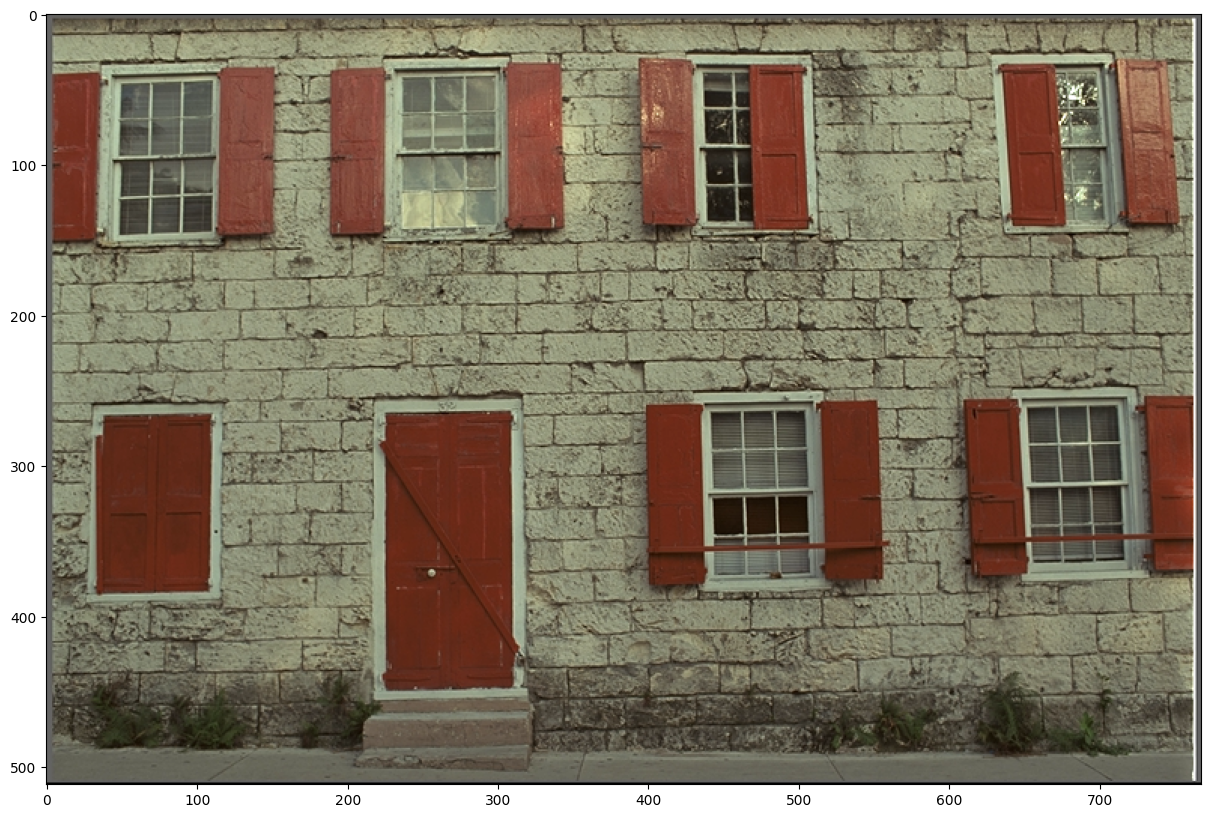

In [2]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (0, 0), sigmaX=2.0, sigmaY=2.0)

In [5]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img.astype(np.float32) - unsharp.astype(np.float32)

In [7]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 1.5
sharpened = img.astype(np.float32) + diff * amount
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

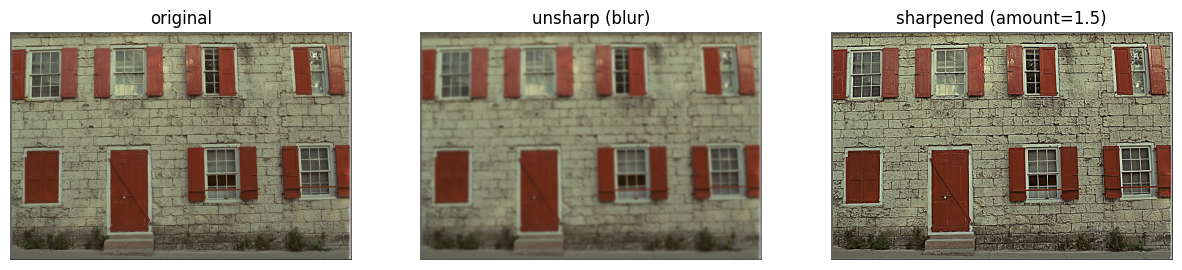

In [8]:
# show
plt.figure()
plt.subplot(131), plt.imshow(img), plt.title("original"), plt.axis("off")
plt.subplot(132), plt.imshow(unsharp), plt.title("unsharp (blur)"), plt.axis("off")
plt.subplot(133), plt.imshow(sharpened), plt.title(f"sharpened (amount={amount})"), plt.axis("off")
plt.show()

### Questions
* What is a good (reasonable) value for the `amount` parameter?
- A reasonable value for the amount parameter is typically in the range: 0.5 – 1.5. For natural images, values around 1.0 often produce visually pleasing sharpening without introducing artifacts.
 * What happens if it is too small?
- If the amount is too small:
The sharpening effect becomes barely visible.
The result looks almost identical to the original image.
Edges are not sufficiently enhanced.
In practice, the filter does not noticeably improve sharpness.
 * What happens if it is too large?
- If the amount is too large:
Strong edge overshoot appears (bright/dark halos around edges).
Noise is amplified.
The image looks unnatural and over-sharpened.
Fine textures may become harsh or grainy.
This is called oversharpening artifacts.